Title: Develop and Evaluate a prediction model using various data science techniques - 2020/21

Author: Joseph Solomon

Date Commenced: 12/05/2022

---



# **Introduction**




This notebook is split into 3 parts with the first part- aiming to:
1. data preparation for further analysis
2.  conduct exploratory analysis of the dataset

---



# **Data Preparation and Exploration - Part 1**

---



##Data Exploration

In [53]:
#Import Relevant Python Libraries
import pandas as pd #Manipulation & Analysis
import matplotlib as mpl #Data Visualisation
%matplotlib inline
from matplotlib import pyplot as plt #Data Visualisation
import seaborn as sns #Data Visualisation
import numpy as np

In [54]:
 #Load in dataset
 Diabetes_data = pd.read_csv("Diabetes_data.csv")

In [55]:
#View Records in Dataset
Diabetes_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [56]:
#View end of dataset
Diabetes_data.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [57]:
#Dataset Structure
Diabetes_data.shape

(520, 17)

The dataset has 520 rows(records) and 17 columns 

In [58]:
#Display dataframe info
Diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

The info() function shows a concise summary of the Diabetes data frame. It displays the data frame columns, index data type, column data type, non-null values, number of entries and memory usage.

From the summary, it can be deduced that there are 520 entries.
It is also evident that there are no null values in the dataset but this will be further investigated later on in this notebook.

In [59]:
#check for null values
pd.isnull(Diabetes_data).sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

The output above further shows that there are no null values in the dataset

In [60]:
#Describe dataset
Diabetes_data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


The youngest person on the dataset is 16 years old and the oldest is 90 years old. The mean age is 48 

In [61]:
#View Genders
Diabetes_data['Gender'].value_counts()

Male      328
Female    192
Name: Gender, dtype: int64

There are 328 males and 192 females in the dataset as seen above

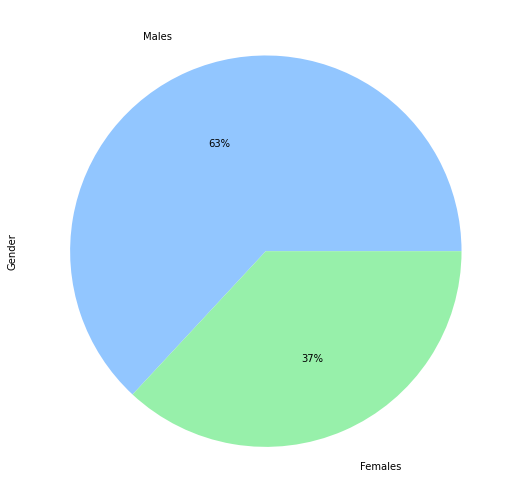

In [62]:
##pie-chart of gender distribution
import matplotlib.style as style
style.available

style.use('seaborn-pastel')
labels = ["Males", "Females"]
Diabetes_data['Gender'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2, figsize=(9,9))
plt.show()

In [63]:
#View Diabetes Status
Diabetes_data['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

There are more people with diabetes than people without as seen above

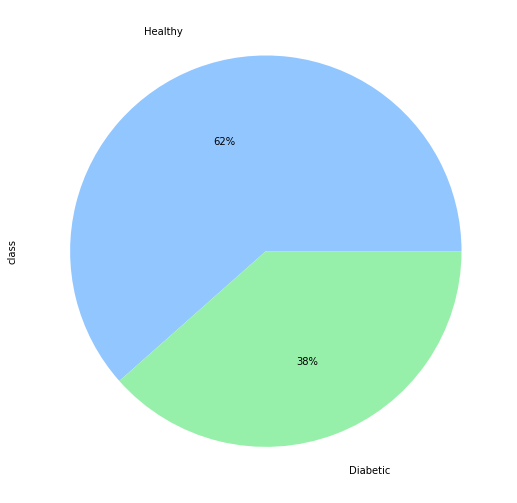

In [64]:
#pie-chart of diabetic distribution
style.use('seaborn-pastel')
labels = ["Healthy", "Diabetic"]
Diabetes_data['class'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2, figsize=(9,9))
plt.show()

62 percent of people in the dataset are healthy and 38 percent are diabetic

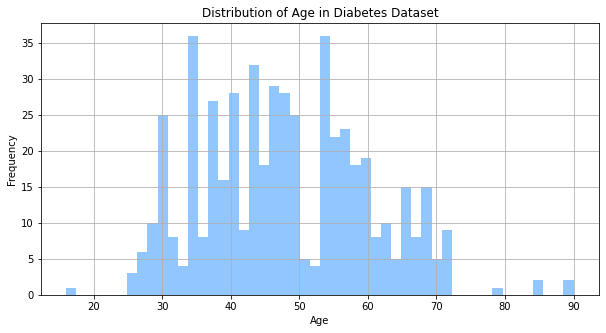

In [65]:
#Age Distribution
Diabetes_data['Age'].hist(bins=50, figsize=(10,5))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age in Diabetes Dataset')
plt.show()

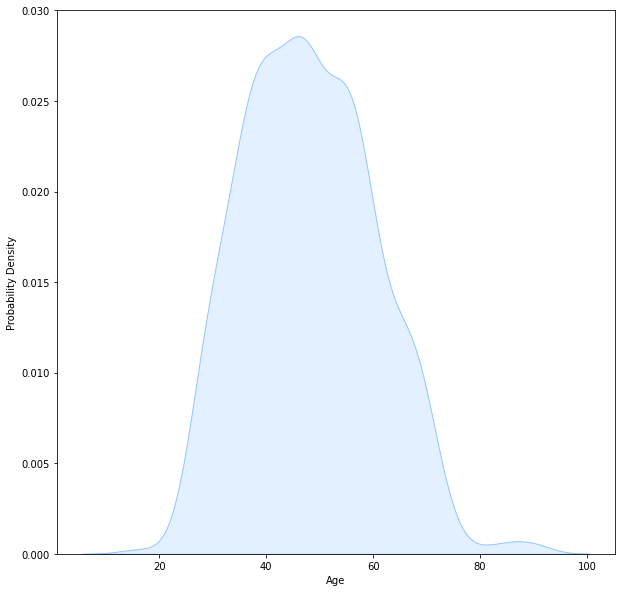

In [66]:
#Density plot of Age
plt.figure(figsize=(10,10))
sns.kdeplot(Diabetes_data['Age'], shade=True, Label="Age")
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.show()

## Data Preparation

In [67]:
#Import relevant python packages
from sklearn import preprocessing #data preprocessing

In [68]:
#Copy dataset
Diabetes = Diabetes_data.copy()

In [69]:
#Drop missing values
Diabetes.dropna(axis = 'rows', inplace = True)

In [70]:
#Inspect copied dataset
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [71]:
#Encoding categorical variables
le = preprocessing.LabelEncoder()

In [72]:
#LabelEncode target variable
Diabetes['class'] = le.fit_transform(Diabetes['class'])

In [73]:
#Inspect changes in dataset
Diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,1
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,1
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,1
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1


The target variable(class) has been tranformed to a numerical value, with postive being 1 and negative being 0

In [74]:
#LabelEncode Predictor variables
Diabetes['Gender'] = le.fit_transform(Diabetes['Gender'])
Diabetes['Polyuria'] = le.fit_transform(Diabetes['Polyuria'])
Diabetes['Polydipsia'] = le.fit_transform(Diabetes['Polydipsia'])
Diabetes['sudden weight loss'] = le.fit_transform(Diabetes['sudden weight loss'])
Diabetes['weakness'] = le.fit_transform(Diabetes['weakness'])
Diabetes['Polyphagia'] = le.fit_transform(Diabetes['Polyphagia'])
Diabetes['Genital thrush'] = le.fit_transform(Diabetes['Genital thrush'])
Diabetes['visual blurring'] = le.fit_transform(Diabetes['visual blurring'])
Diabetes['Itching'] = le.fit_transform(Diabetes['Itching'])
Diabetes['Irritability'] = le.fit_transform(Diabetes['Irritability'])
Diabetes['delayed healing'] = le.fit_transform(Diabetes['delayed healing'])
Diabetes['partial paresis'] = le.fit_transform(Diabetes['partial paresis'])
Diabetes['muscle stiffness'] = le.fit_transform(Diabetes['muscle stiffness'])
Diabetes['Alopecia'] = le.fit_transform(Diabetes['Alopecia'])
Diabetes['Obesity'] = le.fit_transform(Diabetes['Obesity'])

In [75]:
#Inspect Changes
Diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# **Prediction Models - Part 2**

## Feature Selection

In this section, we will be dividing the dataset into two types of variables.
The dependent or target variable(y) and the independent variables or feature variables.

In [76]:
# Imports
from sklearn.model_selection import train_test_split

In [77]:
#Scale Age variable in dataframe
from sklearn.preprocessing import StandardScaler as ss
temp = Diabetes[['Age']].copy()
temp = ss().fit_transform(temp)
Diabetes[['Age']] = temp
Diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,-0.661367,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.821362,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,-0.578993,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,-0.249498,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.986110,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [78]:
#Correlation in dataset
corr = Diabetes.loc[: , Diabetes.columns != 'class'].corr().round(2)
corr

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
Age,1.00,0.06,0.20,0.14,0.06,0.22,0.32,0.10,0.40,0.30,0.20,0.26,0.23,0.31,0.32,0.14
Gender,0.06,1.00,-0.27,-0.31,-0.28,-0.12,-0.22,0.21,-0.21,-0.05,-0.01,-0.10,-0.33,-0.09,0.33,-0.01
Polyuria,0.20,-0.27,1.00,0.60,0.45,0.26,0.37,0.09,0.24,0.09,0.24,0.15,0.44,0.15,-0.14,0.13
Polydipsia,0.14,-0.31,0.60,1.00,0.41,0.33,0.32,0.03,0.33,0.13,0.20,0.12,0.44,0.18,-0.31,0.10
sudden weight loss,0.06,-0.28,0.45,0.41,1.00,0.28,0.24,0.09,0.07,-0.00,0.14,0.09,0.26,0.11,-0.20,0.17
weakness,0.22,-0.12,0.26,0.33,0.28,1.00,0.18,0.03,0.30,0.31,0.15,0.34,0.27,0.26,0.09,0.05
Polyphagia,0.32,-0.22,0.37,0.32,0.24,0.18,1.00,-0.06,0.29,0.14,0.24,0.26,0.37,0.32,-0.05,0.03
Genital thrush,0.10,0.21,0.09,0.03,0.09,0.03,-0.06,1.00,-0.15,0.13,0.16,0.14,-0.20,-0.10,0.20,0.05
visual blurring,0.40,-0.21,0.24,0.33,0.07,0.30,0.29,-0.15,1.00,0.29,0.08,0.18,0.36,0.41,0.01,0.11
Itching,0.30,-0.05,0.09,0.13,-0.00,0.31,0.14,0.13,0.29,1.00,0.11,0.45,0.12,0.22,0.27,0.00


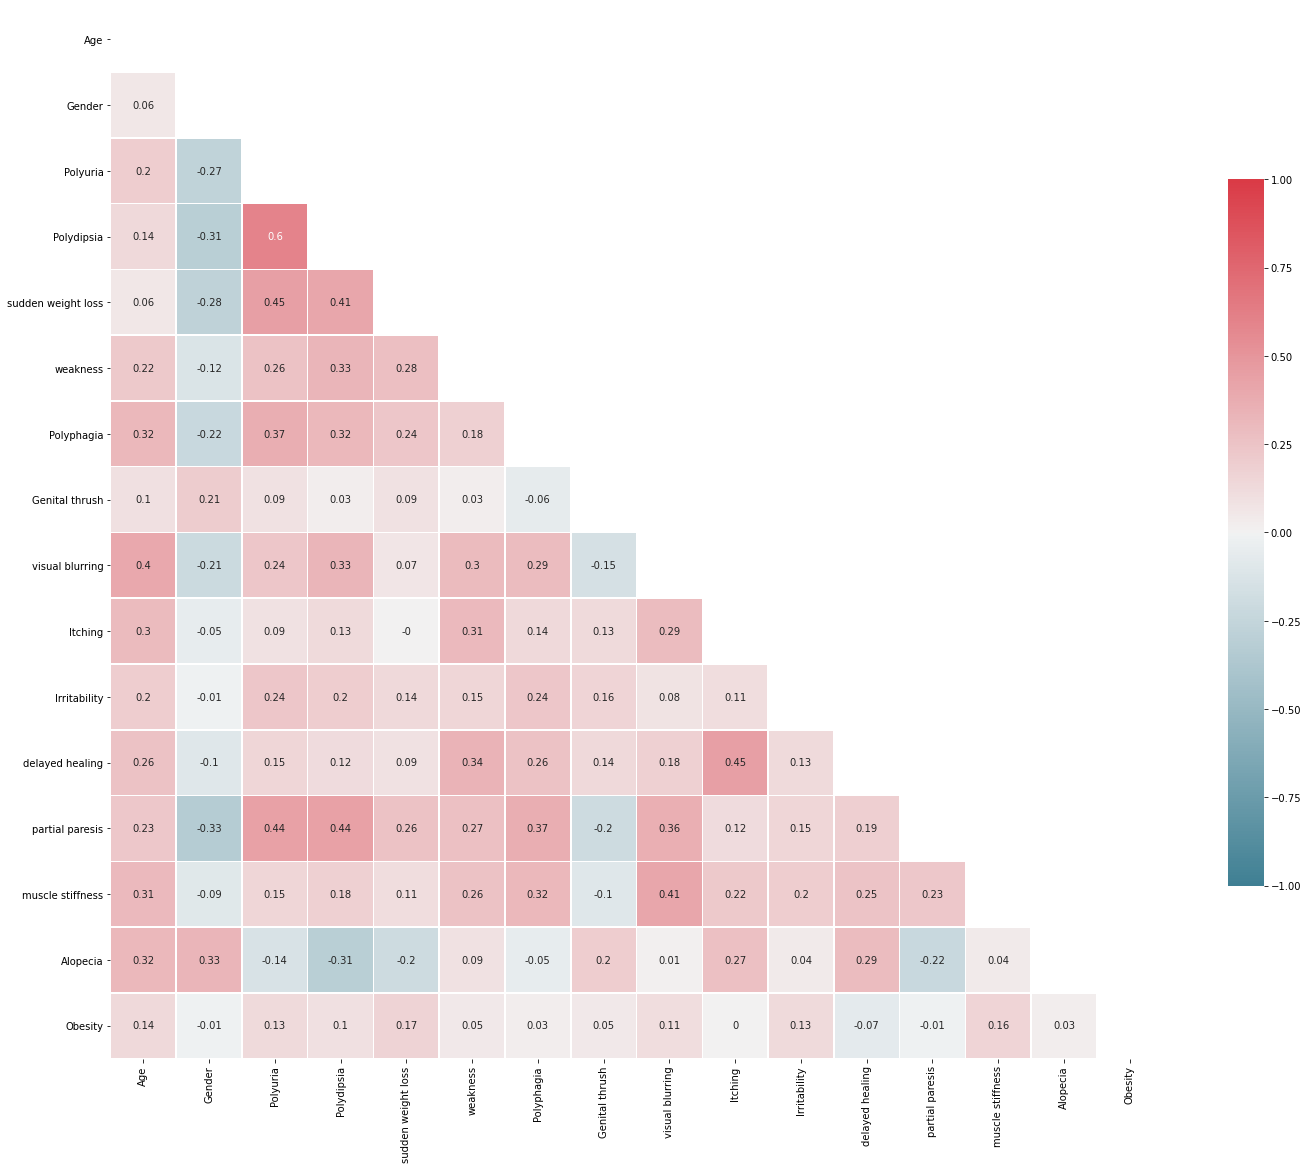

In [79]:
#Correlation Matrix
# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

From the correlation plot seen above, there are low to moderate corelation betwen the features, this is good as we do not want highly correlated features.

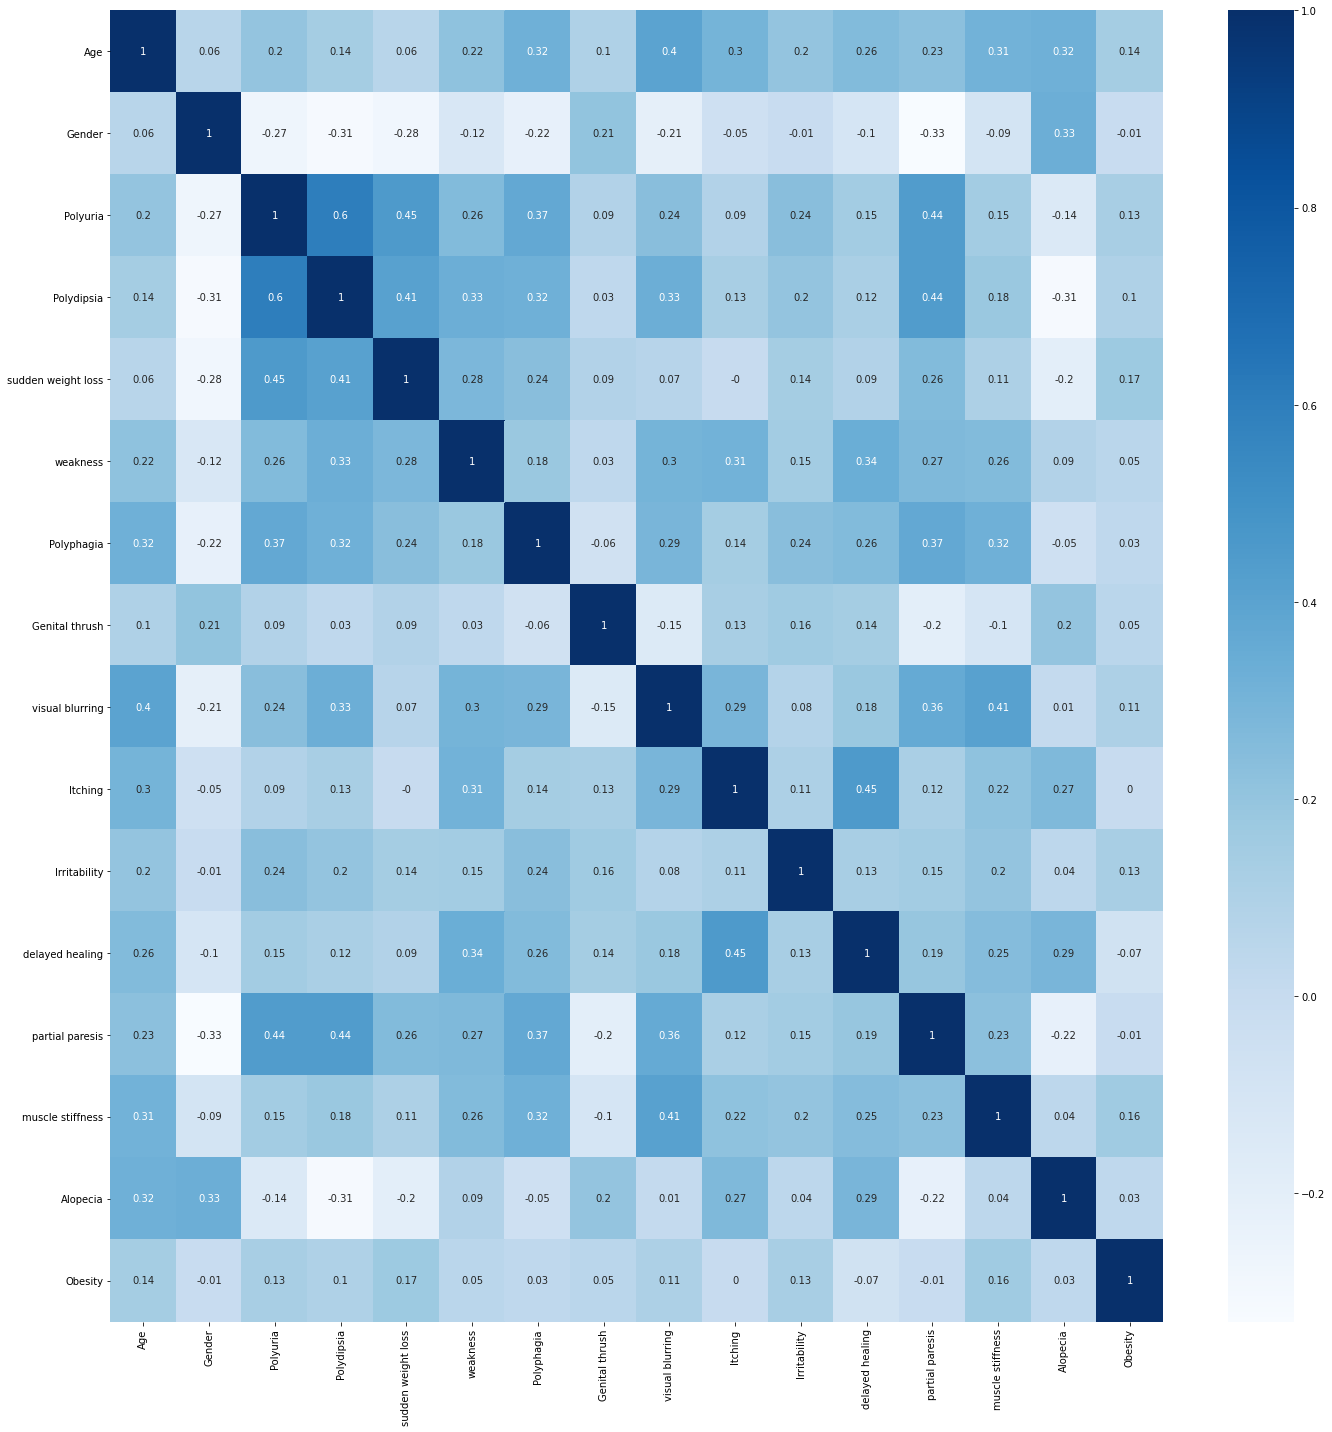

In [80]:
#Correlation Matrix
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='Blues', annot=True)
plt.tight_layout()

In [81]:
# Split dataset into feature and target variables
feature_variables = ['Age','Gender','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity']
target_variable = ['class']
x = Diabetes[feature_variables] # Features
y = Diabetes[target_variable] # Target Variables

In [82]:
#Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## **Logistic Regression**

In [83]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression

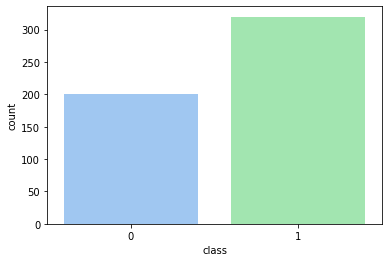

In [84]:
#Plot showing class distribution
sns.countplot(x = 'class', data = Diabetes)
plt.show()

As stated earlier in this notebook, it is evident that there are more positive classes than there are negative classes 

In [85]:
#Inspect features
x.head()

,Age,Gender,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,-0.661367,1,1,0,1,0,0,0,1,0,1,0,1,1,1
1,0.821362,1,0,0,1,0,0,1,0,0,0,1,0,1,0
2,-0.578993,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,-0.249498,1,0,1,1,1,1,0,1,0,1,0,0,0,0
4,0.986110,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [86]:
#Inspect Target Variable
y.head()

,class
0,1
1,1
2,1
3,1
4,1


In [87]:
# fit the model with data
logit = LogisticRegression(verbose = 1).fit(x_train, np.ravel(y_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


## **Evaluate Logistic Model**

In [88]:
#import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score,roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

### **Model Evaluation of Train Dataset**

In [89]:
#Metric scores
y_train_pred = logit.predict(x_train)
print("Accuracy Score:-", accuracy_score(y_train, y_train_pred))
print("F1 Score:-", f1_score(y_train, y_train_pred))
print("Log Loss:-", log_loss(y_train, y_train_pred))
print("Precision Score:-",precision_score(y_train, y_train_pred))
print("Recall Score:-", recall_score(y_train, y_train_pred))
print("ROC-AUC Score:-",roc_auc_score(y_train, y_train_pred))

Accuracy Score:- 0.9285714285714286
F1 Score:- 0.9400921658986175
Log Loss:- 2.4670730303492294
Precision Score:- 0.9622641509433962
Recall Score:- 0.918918918918919
ROC-AUC Score:- 0.9312904453749524


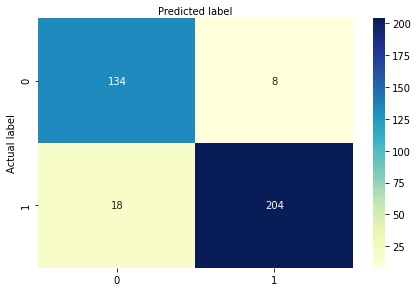

In [90]:
#confusion matrix
cnf_matrix = confusion_matrix(y_train, y_train_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [91]:
#classification report
report = classification_report(y_train, y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       142
           1       0.96      0.92      0.94       222

    accuracy                           0.93       364
   macro avg       0.92      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



In [92]:
#View first 10 prediction records 
y_train_pred[:10]

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0])

In [93]:
#View first 10 records in train dataset and compare
y_train[:10]

,class
122,1
168,1
23,1
13,1
61,1
310,0
39,1
376,0
246,0
218,0


### **Model Evaluation of Test Dataset**

In [94]:
#Metric scores
y_test_pred = logit.predict(x_test)
print("Accuracy Score:-", accuracy_score(y_test, y_test_pred))
print("F1 Score:-", f1_score(y_test, y_test_pred))
print("Log Loss:-", log_loss(y_test, y_test_pred))
print("Precision Score:-",precision_score(y_test, y_test_pred))
print("Recall Score:-", recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-",roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 0.8974358974358975
F1 Score:- 0.9166666666666666
Log Loss:- 3.54246935835354
Precision Score:- 0.9361702127659575
Recall Score:- 0.8979591836734694
ROC-AUC Score:- 0.8972554539057003


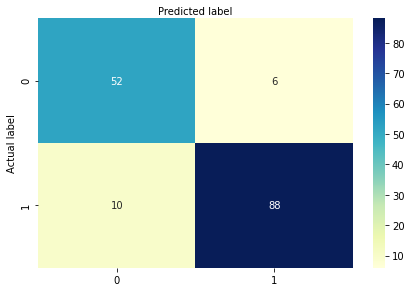

In [95]:
#confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [96]:
#classification report
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        58
           1       0.94      0.90      0.92        98

    accuracy                           0.90       156
   macro avg       0.89      0.90      0.89       156
weighted avg       0.90      0.90      0.90       156



In [97]:
#View first 10 prediction records
y_test_pred[:10]

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [98]:
#View first 10 records in train dataset and compare
y_test[:10]


,class
273,0
272,0
329,0
480,0
173,1
62,1
232,0
147,1
370,0
267,1


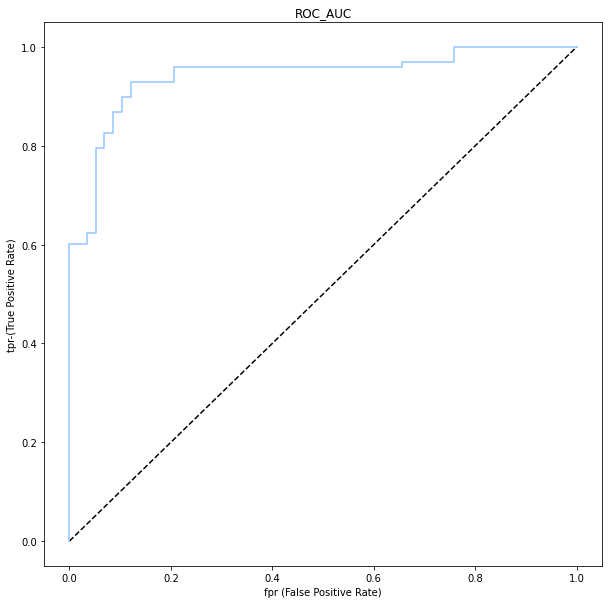

In [99]:
#ROC curve plot
y_test_pred_prob=logit.predict_proba(x_test)[:,1]
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Positive Rate)")
plt.ylabel("tpr-(True Positive Rate)")
plt.title("ROC_AUC")
plt.show()

## **Decision Trees**

In [100]:
# imports
from sklearn.tree import DecisionTreeClassifier

In [101]:
tree_fit = DecisionTreeClassifier()
# Look at parameters used by our current forest
from pprint import pprint
print('Parameters currently in use:\n')
pprint(tree_fit.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}


In [102]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV #Grid Search

# set different parameter values to tune
param_grid = {
    "max_depth": [4, 5, 6, 7, 8, 10, None],
    "max_features": [6, 7, 8, 10, None],
    "criterion": ["gini", "entropy"],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}
gridSearchCV = GridSearchCV(estimator=tree_fit, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
gridSearchCVResults = gridSearchCV.fit(x_train, y_train)


Fitting 5 folds for each of 630 candidates, totalling 3150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 3150 out of 3150 | elapsed:   13.3s finished


In [103]:
print(f"Best score = {gridSearchCVResults.best_score_}, Best Hyperparameters ={gridSearchCVResults.best_params_}")

Best score = 0.9614916286149162, Best Hyperparameters ={'criterion': 'gini', 'max_depth': 8, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [104]:
#Grid Search - 2
#Hyperparameter Tuninig
# set different parameter values to tune
param_grid = {
    "max_depth": [ 6, 7, 8, 9, 10, 11, 12, None],
    "max_features": [3, 4, 5, 6, None, 8, 10],
    "criterion": ["gini", "entropy"],
    "min_samples_split" : [4, 5, 8, 10],
    "min_samples_leaf" : [1, 2, 4, 6, 8, 10]
}
gridSearchCV2 = GridSearchCV(
    estimator=tree_fit, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

gridSearchCVResults2 = gridSearchCV.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 630 candidates, totalling 3150 fits


[Parallel(n_jobs=-1)]: Done 988 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 3150 out of 3150 | elapsed:   11.9s finished


In [105]:
print(f"Best score = {gridSearchCVResults2.best_score_}, Best Hyperparameters ={gridSearchCVResults2.best_params_}")

Best score = 0.9614535768645357, Best Hyperparameters ={'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [106]:
#Random Srearch
from sklearn.model_selection import RandomizedSearchCV

#Hyperparameter Tuninig
# set different parameter values to tune
param_grid = {
    "max_depth": [ 6, 7, 8, 9, 10, 11, 12, None, 14, 16],
    "max_features": [3, 4, 5, 6, None, 8, 10, 12 ],
    "criterion": ["gini", "entropy"],
    "min_samples_split" : [2, 4, 5, 8, 10, 12],
    "min_samples_leaf" : [1, 2, 4, 6, 8, 10, 12]
}
# set gridsearch
randomizedSearchCV = RandomizedSearchCV(
    estimator=tree_fit, param_distributions=param_grid,n_iter=5, cv=5, verbose=0, n_jobs=1,random_state=42
)

randomizedSearchCVResults = randomizedSearchCV.fit(x_train, y_train)

In [107]:
print(f"Best score = {randomizedSearchCVResults.best_score_}, Best Hyperparameters ={randomizedSearchCVResults.best_params_}")


Best score = 0.9120624048706241, Best Hyperparameters ={'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': None, 'max_depth': 8, 'criterion': 'gini'}


In [108]:
#Create model with best hyperparameters

#Best score = 0.9615677321156774, 
#Best Hyperparameters ={'criterion': 'entropy', 'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}

dict_best_params = gridSearchCVResults.best_params_
best_max_depth=dict_best_params["max_depth"]
best_criterion=dict_best_params["criterion"]
best_max_features=dict_best_params["max_features"]
best_min_samples_leaf=dict_best_params["min_samples_leaf"]
best_min_samples_split=dict_best_params["min_samples_split"]

tree_bestfit = DecisionTreeClassifier(random_state=1, max_depth= best_max_depth, criterion = best_criterion, 
                                  max_features=best_max_features, 
                                  min_samples_leaf=best_min_samples_leaf,
                                  min_samples_split=best_min_samples_split)


#Fit RandomForestRegressor model
tree_bestfit.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [109]:
print(tree_bestfit.score(x_train, y_train))
print(tree_bestfit.score(x_test, y_test))

0.9917582417582418
0.9487179487179487


In [110]:
tree_bestfit.feature_importances_

array([0.08190006, 0.08447022, 0.40398763, 0.        , 0.02453628,
       0.06387846, 0.05025489, 0.0445527 , 0.01316788, 0.08381685,
       0.01561946, 0.02316413, 0.06986219, 0.04078925, 0.        ])

In [111]:
tree_bestfit_feature_importances = pd.Series(tree_bestfit.feature_importances_,
index = ['Age','Gender','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity'])

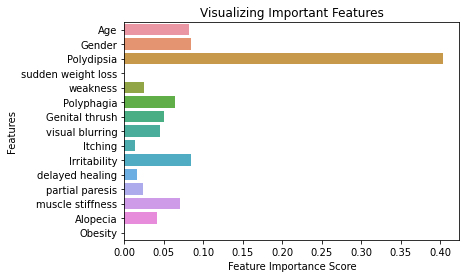

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x = tree_bestfit_feature_importances, y=tree_bestfit_feature_importances.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Visual blurring and obesity features can be removed as they are of low importance 

In [113]:
# Split dataset into feature and target variables
feature_variables = ['Age','Gender','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia'] # Removed obesity and visual blurring
target_variable = ['class']
x2 = Diabetes[feature_variables] # Features
y2 = Diabetes[target_variable] # Target Variables

In [114]:
#Splitting the dataset into the Training set and Test set
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.3, random_state = 1)

In [115]:
tree_bestfit.fit(x_train2, y_train2)
print(tree_bestfit.score(x_train2, y_train2))
print(tree_bestfit.score(x_test2, y_test2))

0.9917582417582418
0.9487179487179487


An increase in accuracy is observed

### **Model Evaluation of Test Dataset**

In [116]:
#Metric scores
y_test_pred = tree_bestfit.predict(x_test2)
print("Accuracy Score:-", accuracy_score(y_test2, y_test_pred))
print("F1 Score:-", f1_score(y_test2, y_test_pred))
print("Log Loss:-", log_loss(y_test2, y_test_pred))
print("Precision Score:-",precision_score(y_test2, y_test_pred))
print("Recall Score:-", recall_score(y_test2, y_test_pred))
print("ROC-AUC Score:-",roc_auc_score(y_test2, y_test_pred))

Accuracy Score:- 0.9487179487179487
F1 Score:- 0.9587628865979382
Log Loss:- 1.7712346791767704
Precision Score:- 0.96875
Recall Score:- 0.9489795918367347
ROC-AUC Score:- 0.9486277269528501


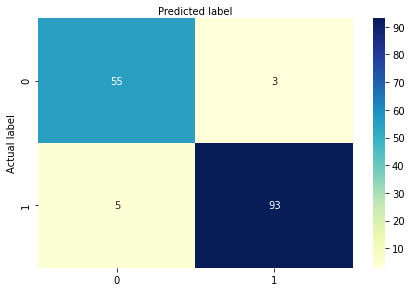

In [117]:
#confusion matrix
cnf_matrix = confusion_matrix(y_test2, y_test_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [118]:
#classification report
report = classification_report(y_test2, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        58
           1       0.97      0.95      0.96        98

    accuracy                           0.95       156
   macro avg       0.94      0.95      0.95       156
weighted avg       0.95      0.95      0.95       156



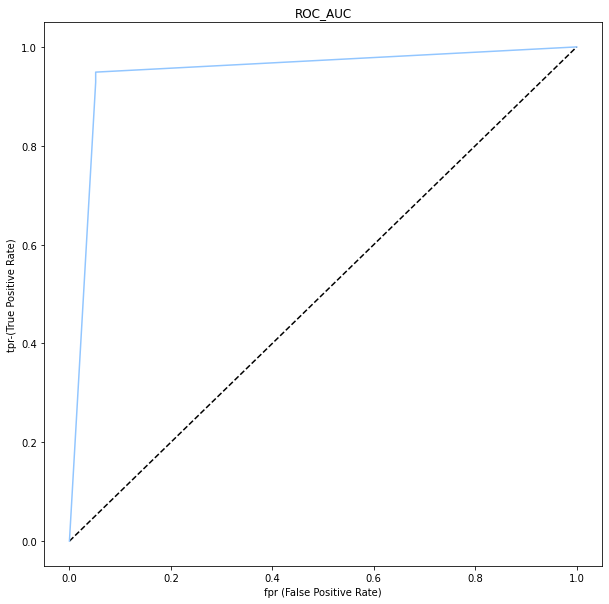

In [119]:
#ROC curve plot
y_test_pred_prob=tree_bestfit.predict_proba(x_test2)[:,1]
fpr, tpr,thresholds=roc_curve(y_test2,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Positive Rate)")
plt.ylabel("tpr-(True Positive Rate)")
plt.title("ROC_AUC")
plt.show()

In [120]:
#View first 10 prediction records
y_test_pred[:10]

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [121]:
#View first 10 records in train dataset and compare
y_test2[:10]

,class
273,0
272,0
329,0
480,0
173,1
62,1
232,0
147,1
370,0
267,1


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


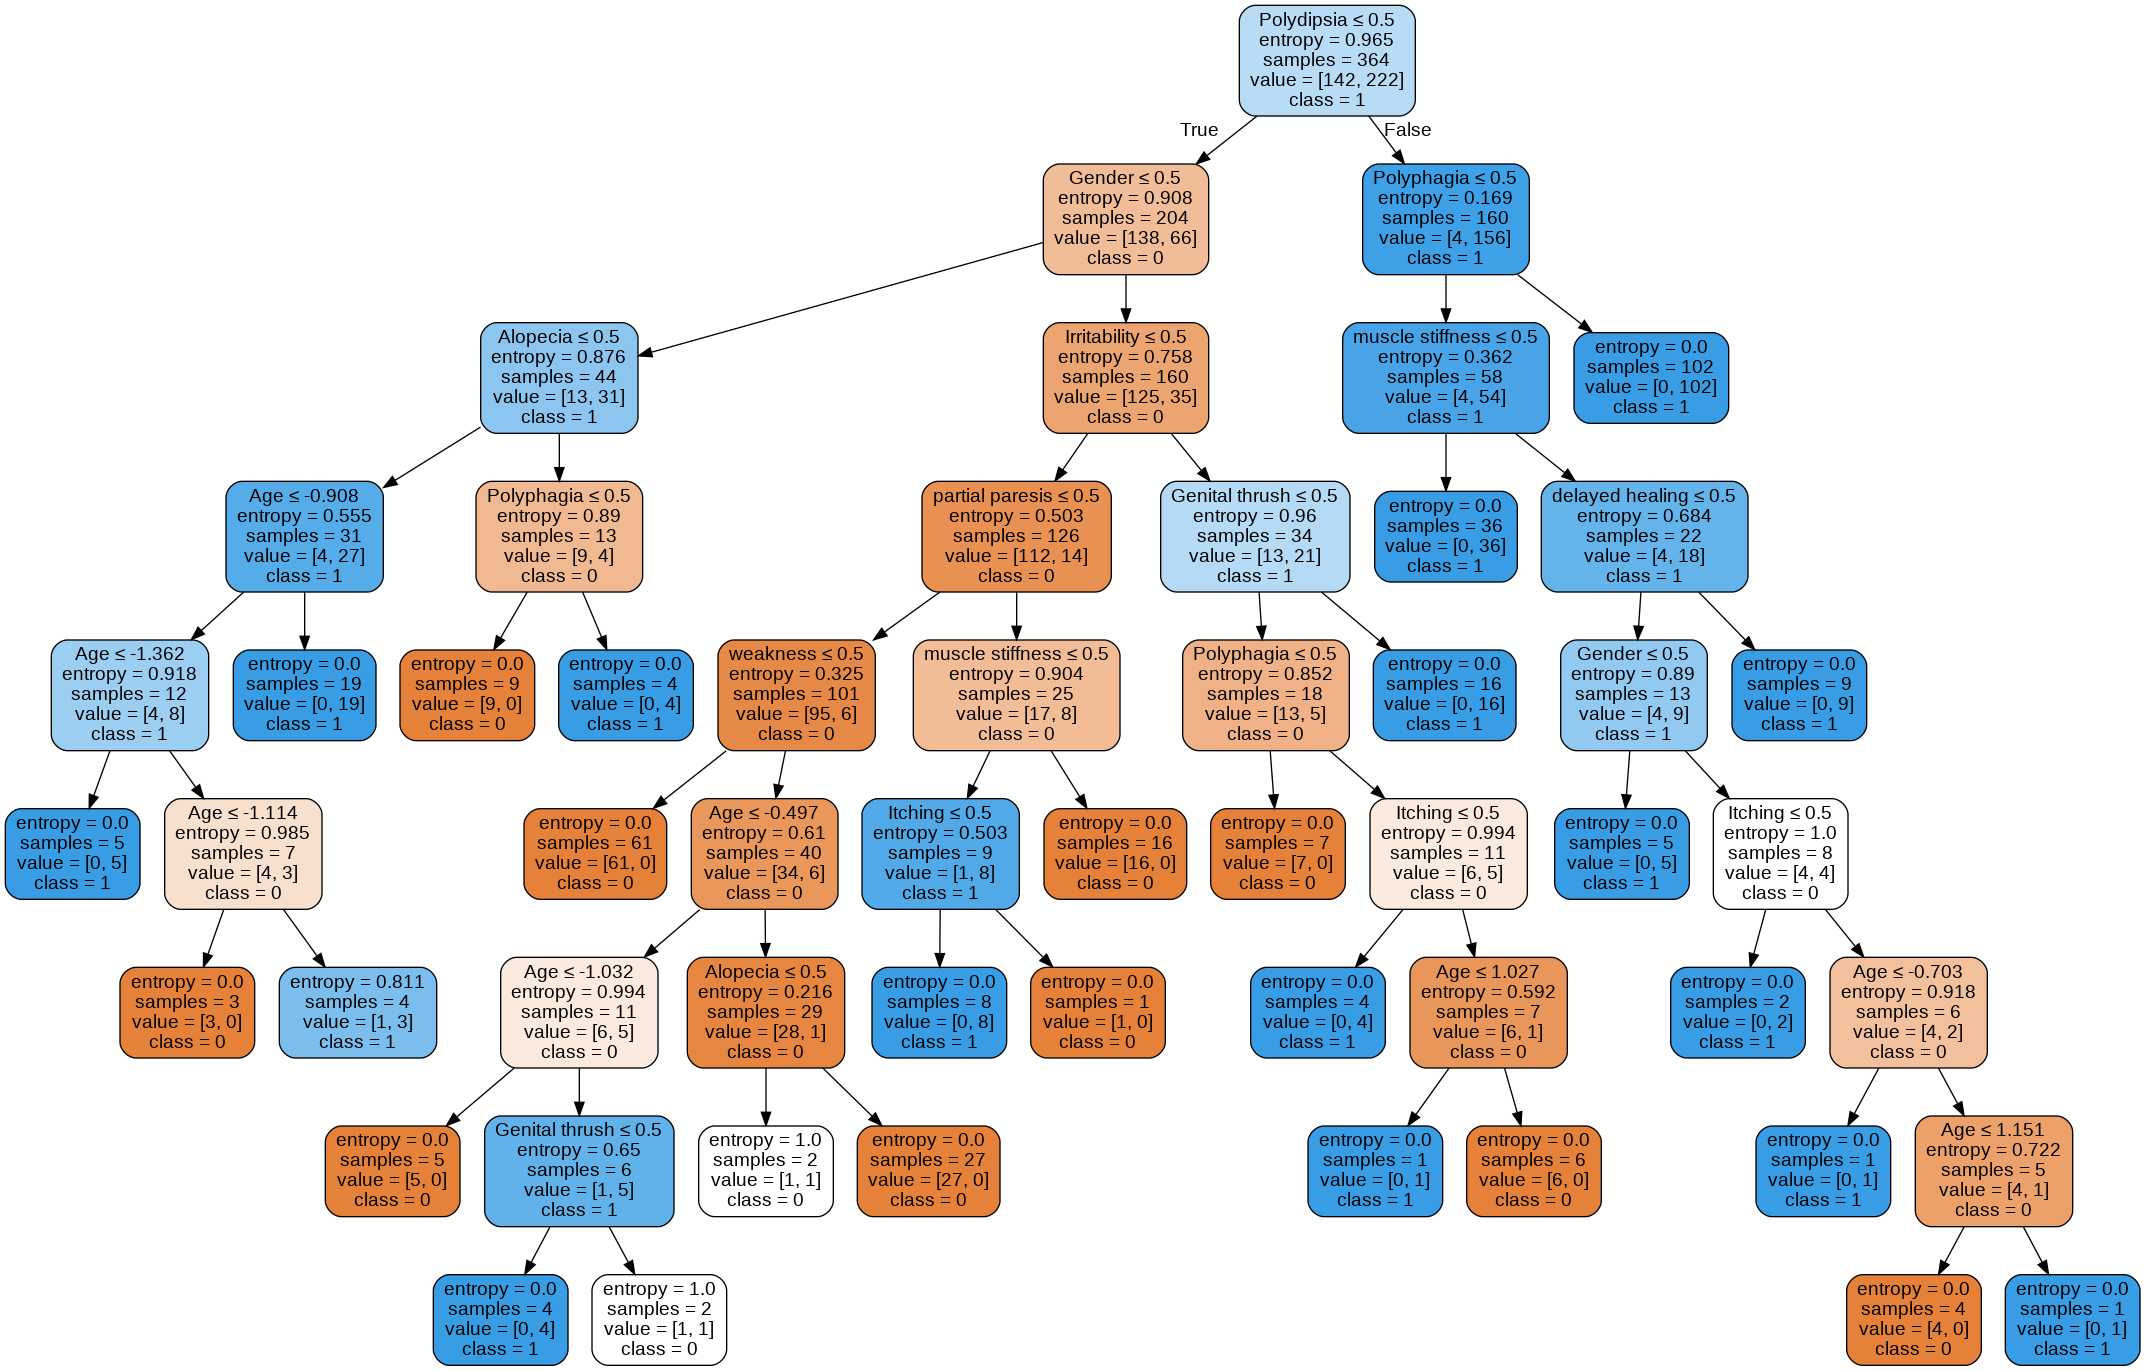

In [122]:
#Visualise Decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_bestfit, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_variables,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## **Random Forest Classifier**

In [123]:
#imports
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf_model = RandomForestClassifier()
# Look at parameters used by our current forest
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [126]:
#Random Search
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [128]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_model = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.3min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [129]:
print(f"Best score = {rf_random.best_score_}, Best Hyperparameters ={rf_random.best_params_}")

Best score = 0.9669873097592919, Best Hyperparameters ={'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}


In [130]:
#Hyperparameter Tuning
#Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [40, 50, 60, 70, 80],
    'max_features': [2, 3,'auto', 'sqrt'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [400, 600, 800, 1000]
}
# Create a based model
rf_model = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid,
                          cv = 2, n_jobs = -1, verbose = 2)


In [131]:
grid_search.fit(x_train,y_train)

Fitting 2 folds for each of 480 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 10.8min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [139]:
print(f"Best score = {grid_search.best_score_}, Best Hyperparameters ={grid_search.best_params_}")

Best score = 0.9642857142857142, Best Hyperparameters ={'bootstrap': False, 'max_depth': 40, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 600}


In [140]:
#Create model with best hyperparameters

#Best score = 0.9642857142857143, 
#Best Hyperparameters = {'bootstrap': False, 'max_depth': 60, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 600}




#rf_model = RandomForestClassifier(random_state=1, max_depth=60, 
#                                  max_samples=300, max_features=2, 
#                                  n_estimators=600)

dict_best_params=randomizedSearchCVResults.best_params_
best_max_depth=dict_best_params["max_depth"]
best_max_features=dict_best_params["max_features"]
best_min_samples_leaf=dict_best_params["min_samples_leaf"]
best_min_samples_split=dict_best_params["min_samples_split"]


rf_model = RandomForestClassifier(random_state=1,bootstrap = False,
                                  max_depth= best_max_depth, 
                                  max_samples=300, 
                                  max_features=best_max_features,
                                  min_samples_leaf=best_min_samples_leaf,
                                  min_samples_split = best_min_samples_split,
                                  n_estimators=600)


#Fit RandomForestRegressor model
rf_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=None,
                       max_leaf_nodes=None, max_samples=300,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [142]:
#feature importance
rf_model.feature_importances_

array([0.05037205, 0.11348904, 0.53032603, 0.00126135, 0.00757453,
       0.00628918, 0.06156868, 0.00418751, 0.        , 0.09573144,
       0.00139349, 0.01896376, 0.06405806, 0.04049473, 0.00429015])

In [144]:
rf_feature_importances = pd.Series(rf_model.feature_importances_,
index = ['Age','Gender','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity'])

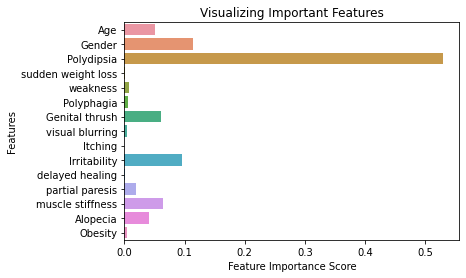

In [146]:
# Creating a bar plot
sns.barplot(x = rf_feature_importances, y=rf_feature_importances.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### **Model Evaluation of Test Dataset**

In [147]:
#Metric scores
y_test_pred = rf_model.predict(x_test)
print("Accuracy Score:-", accuracy_score(y_test, y_test_pred))
print("F1 Score:-", f1_score(y_test, y_test_pred))
print("Log Loss:-", log_loss(y_test, y_test_pred))
print("Precision Score:-",precision_score(y_test, y_test_pred))
print("Recall Score:-", recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-",roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 0.8846153846153846
F1 Score:- 0.9052631578947369
Log Loss:- 3.9852741839293175
Precision Score:- 0.9347826086956522
Recall Score:- 0.8775510204081632
ROC-AUC Score:- 0.8870513722730471


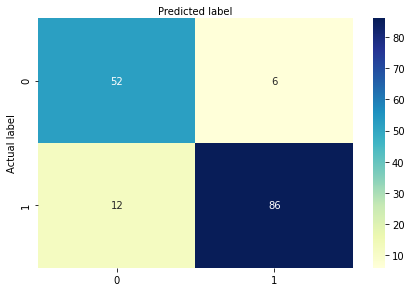

In [148]:
#confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [149]:
#classification report
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        58
           1       0.93      0.88      0.91        98

    accuracy                           0.88       156
   macro avg       0.87      0.89      0.88       156
weighted avg       0.89      0.88      0.89       156



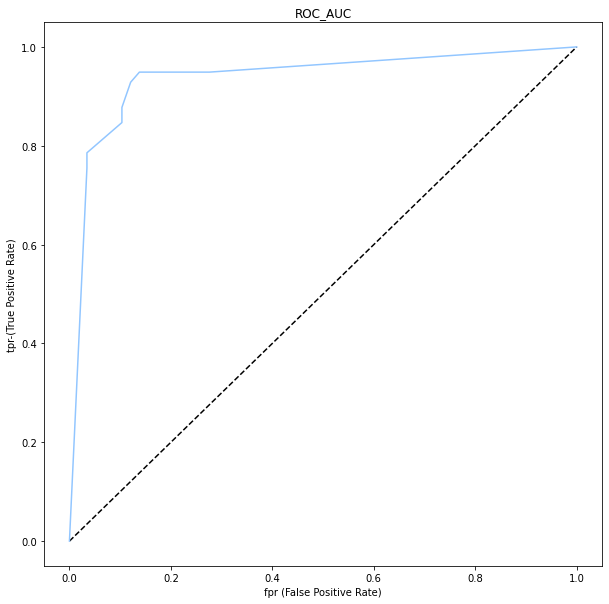

In [150]:
#ROC curve plot
y_test_pred_prob=rf_model.predict_proba(x_test)[:,1]
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Positive Rate)")
plt.ylabel("tpr-(True Positive Rate)")
plt.title("ROC_AUC")
plt.show()

## **Neural Network**

In [151]:
#imports
import numpy as np #to perform a number of mathematical operations
np.random.seed(1)
import tensorflow as tf #for deep learning
tf.random.set_seed(1)
from keras import models, layers, optimizers, initializers, backend #to build neural network
from keras.datasets import mnist, reuters #dataset for classification 
from keras.utils import to_categorical # to convert to categorical values
print('Done')

Done


In [152]:
opts = optimizers.Adam()
init = initializers.he_uniform(seed=1)

# Architecture
network = models.Sequential()
network.add(layers.Dense(900, activation ='relu', kernel_initializer=init))
network.add(layers.Dense(700, activation ='relu', kernel_initializer=init))
network.add(layers.Dense(700, activation ='relu', kernel_initializer=init))
network.add(layers.Dense(1, activation ='sigmoid', kernel_initializer=init))

# Optimizer and Error
network.compile(optimizer=opts, loss='binary_crossentropy', metrics=['accuracy'])

# Train
network.fit(x_train, y_train, epochs=5, batch_size = 32)

Epoch 1/5
12/12 [==============================] - 1s 20ms/step - loss: 0.4324 - accuracy: 0.7712
Epoch 2/5
12/12 [==============================] - 0s 21ms/step - loss: 0.1787 - accuracy: 0.9273
Epoch 3/5
12/12 [==============================] - 0s 21ms/step - loss: 0.0561 - accuracy: 0.9773
Epoch 4/5
12/12 [==============================] - 0s 20ms/step - loss: 0.0373 - accuracy: 0.9920
Epoch 5/5
12/12 [==============================] - 0s 20ms/step - loss: 0.0238 - accuracy: 0.9855


In [153]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print("Accuracy on test set =", test_acc)

5/5 [==============================] - 0s 7ms/step - loss: 0.1638 - accuracy: 0.9487
Accuracy on test set = 0.9487179517745972


After considering all models, the decision tree model is the best model for this dataset. As it performs best on the test dataset.

# Critical Evaluation - Part 3